# imports

In [1]:
import pandas as pd
import numpy as np
# matplotlib
from matplotlib import pyplot as plt
# plotly
import plotly
#seaborn
import seaborn as sns
#plotly express
import plotly.express as px
# stats
from scipy import stats
# qqplot
from statsmodels.graphics.gofplots import qqplot

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



# Data

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'
conn_str = f'postgresql://{postgres_user}:{postgres_pw}@{postgres_host}:{postgres_port}/{postgres_db}'
query = '''
SELECT *
FROM useducation
'''
df = pd.read_sql_query(query, con=conn_str)
df.head()

/usr/local/lib/python3.6/dist-packages/psycopg2/__init__.py:144: UserWarning:

The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.



,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,NaN,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,NaN,37451.0,2371.0,10152.0,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,NaN,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,NaN,145212.0,808.0,33511.0,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,NaN,2044688.0,59067.0,431763.0,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


In [3]:
# fill missing values with interpolation
fill_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE",
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE",
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G",
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G",
             "GRADES_9_12_G", "GRADES_ALL_G"]

states = df["STATE"].unique()

for state in states:
    df.loc[df["STATE"] == state, fill_list] = df.loc[df["STATE"] == state, fill_list].interpolate()

# we drop the null values after interpolation
df.dropna(inplace=True)

# Task 1
Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values?

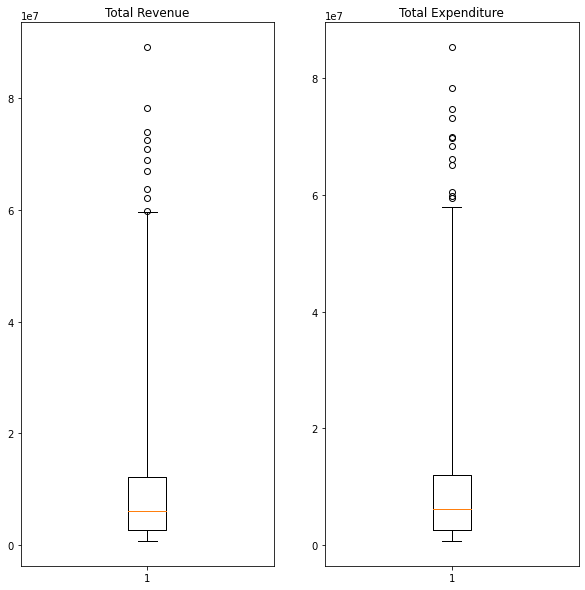

In [4]:
# increase the plot size
plt.figure(figsize=(10,10))

# create a 1,2 grid of plots
plt.subplot(1,2,1)
# box plots with a whis value of 5 to decrease number of outliers
plt.boxplot(df.TOTAL_REVENUE, whis=5)
plt.title("Total Revenue")

plt.subplot(1,2,2)
plt.boxplot(df.TOTAL_EXPENDITURE, whis=5)
plt.title("Total Expenditure")
plt.show()

# Task 2
If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there are no outlier values after you handled them.

In [5]:
# z-score
from scipy.stats import zscore

# winsorize method
from scipy.stats.mstats import winsorize

In [6]:
# winsorize both variables for total_revenue and total_expenditure
win_revenue = winsorize(df.TOTAL_REVENUE, (0,0.05))
win_expenditure = winsorize(df.TOTAL_EXPENDITURE, (0,0.05))

- confirm no outliers

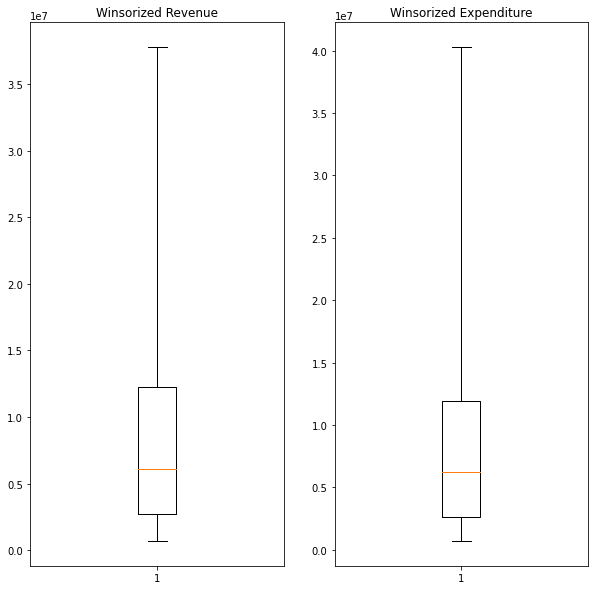

In [7]:
# increase the plot size
plt.figure(figsize=(10,10))

# create a 1,2 grid of plots
plt.subplot(1,2,1)
# box plots with a whis value of 5 to decrease number of outliers
plt.boxplot(win_revenue, whis=5)
plt.title("Winsorized Revenue")

plt.subplot(1,2,2)
plt.boxplot(win_expenditure, whis=5)
plt.title("Winsorized Expenditure")
plt.show()

# Task 3
Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique that think is most suitable.

In [8]:
# create deficit variable that is diff in revenue and expenditure
deficit = df.TOTAL_REVENUE - df.TOTAL_EXPENDITURE

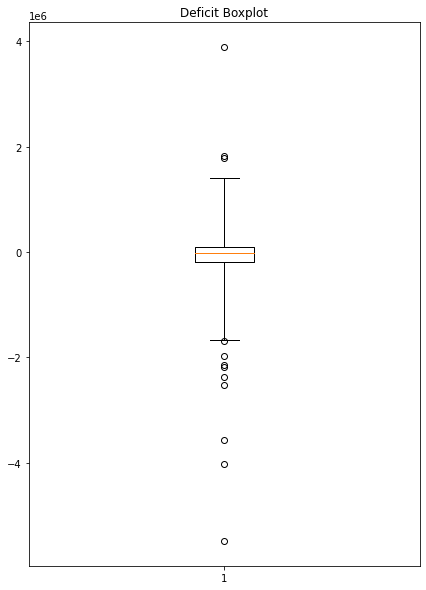

In [9]:
# check deficit var for outliers
plt.figure(figsize=(7,10))
plt.boxplot(deficit, whis=5)
plt.title("Deficit Boxplot")
plt.show()

> There are outliers on both sides of the plot

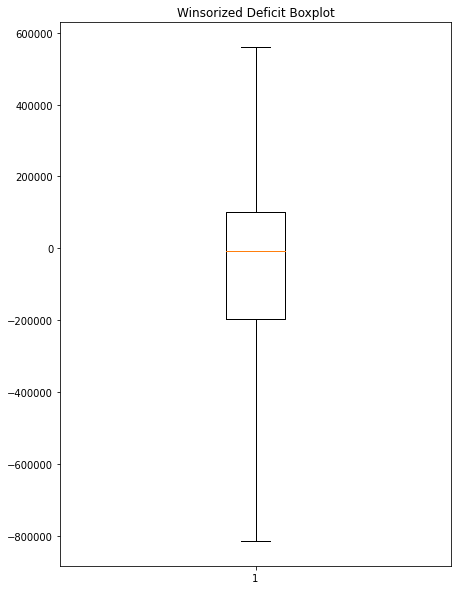

In [10]:
# winsorise deficit var
win_deficit = winsorize(deficit, (0.06, 0.05))

# check win_deficit var for outliers
plt.figure(figsize=(7,10))
plt.boxplot(win_deficit, whis=3)
plt.title("Winsorized Deficit Boxplot")
plt.show()

> winsorized deficit variable doesn't have outliers

# Task 4
Now create another variable by subtracting the TOTAL_EXPENDITURE from TOTAL_REVENUE. This time, use the outlier eliminated versions of TOTAL_EXPENDITURE from TOTAL_REVENUE. In this newly created variable, can you find any outliers? If so, eliminate them.

In [11]:
# create a 2nd winsorized deficit var from the previous win vars
deficit2 = win_revenue - win_expenditure

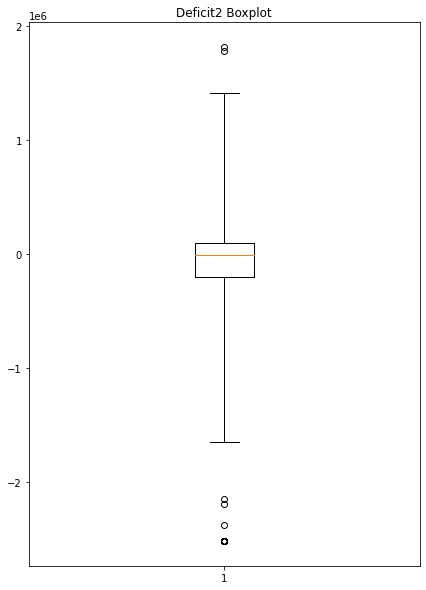

In [12]:
# check new deficit var for outliers
plt.figure(figsize=(7,10))
plt.boxplot(deficit2, whis=5)
plt.title("Deficit2 Boxplot")
plt.show()

> The 2nd deficit var has a few outliers on both sides of the plot

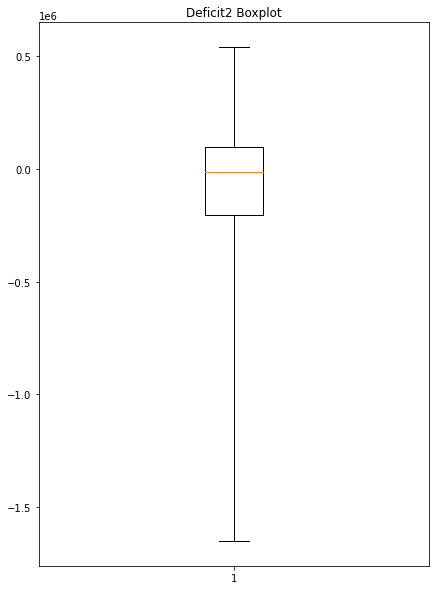

In [13]:
# winsorize deficit2
win_deficit2 = winsorize(deficit2, (0.06, 0.05))

# check new win_deficit2 var for outliers
plt.figure(figsize=(7,10))
plt.boxplot(win_deficit2, whis=5)
plt.title("Deficit2 Boxplot")
plt.show()

> win_deficit2 var outliers removed

# Task 5
Compare some basic descriptive statistics of the budget variables you end up with in the third and the fourth questions. Do you see any differences?

In [14]:
win_deficit = pd.Series(win_deficit)
win_deficit2 = pd.Series(win_deficit2)
deficits = pd.DataFrame([win_deficit, win_deficit2]).T
deficits.describe()

,0,1
count,466.000000,4.660000e+02
mean,-53350.667382,-1.235935e+05
std,328298.931280,4.864445e+05
min,-814914.000000,-1.650831e+06
25%,-196574.750000,-2.047750e+05
50%,-8872.500000,-1.282350e+04
75%,101394.750000,9.826300e+04
max,560511.000000,5.400550e+05


> Both outlier elimination methods results in significantly different resulting data

# Task 6
If your variable of interest is the budget deficit variable, which method do you think is the most appropriate in dealing with the outliers in this variable: the method in the third question or the one in the fourth question?

> I think the appropriate method would be to winsorize them after creating the variable so you're not creating a variable from 2 manipulated vars